**Question 1**

In [1]:
import numpy as np

def jacobi(A, b, x0, iterations):
    n = len(A)
    x = x0.copy()
    x_new = np.zeros_like(x)

    print("n\t", end="")
    for i in range(n):
        print(f"x({i+1})\t", end="")
    print()

    for it in range(iterations):
        print(it, end="\t")
        for i in range(n):
            sigma = 0
            for j in range(n):
                if j != i:
                    sigma += A[i][j] * x[j]
            x_new[i] = (b[i] - sigma) / A[i][i]
            print(f"{x_new[i]:.4f}\t", end="")
        print()
        x = x_new.copy()

# Define the system of equations
A = np.array([[5, 1, 2, 5, -1],
              [2, 10, 2, -2, 1],
              [0, 3, 8, 1, -3],
              [1, 4, 2, 8, 4],
              [-2, 3, 4, 7, 5]])

b = np.array([15, -21, 7, 9, 11])

# Initial guess
x0 = np.array([6, 0, 0, 0, 0])

# Number of iterations
iterations = 5

# Solve using Jacobi method and document the results
jacobi(A, b, x0, iterations)


n	x(1)	x(2)	x(3)	x(4)	x(5)	
0	3.0000	-2.0000	0.0000	0.0000	3.0000	
1	4.0000	-3.0000	2.0000	0.0000	4.0000	
2	3.0000	-3.0000	3.0000	0.0000	4.0000	
3	3.0000	-3.0000	3.0000	0.0000	2.0000	
4	2.0000	-3.0000	2.0000	0.0000	2.0000	


**Question 2**

The fitted curve is: y = -0.0048000000000000135*t^2 + 1.4000000000000021*t + -1.155886961072864e-23


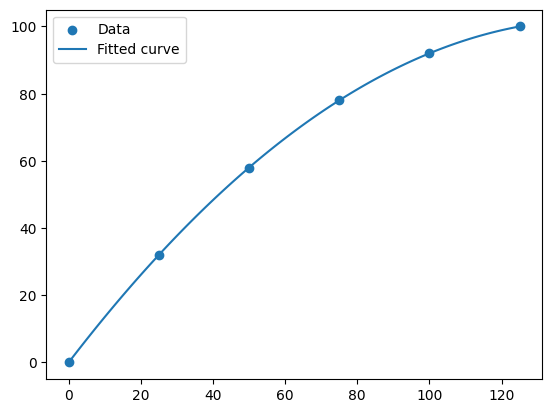

The velocity of the rocket at t = 62.5 s is 0.8000000000000005 km/s


In [4]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.misc import derivative

# Data
t = np.array([0, 25, 50, 75, 100, 125])
y = np.array([0, 32, 58, 78, 92, 100])

# Define the form of the function we want to fit
def func(t, a, b, c):
    return a*t**2 + b*t + c

# Use curve_fit to fit the function to our data
popt, pcov = curve_fit(func, t, y)

# Print the optimal parameters a, b, c
a, b, c = popt
print(f"The fitted curve is: y = {a}*t^2 + {b}*t + {c}")

# Plot the data and the fitted curve
plt.scatter(t, y, label='Data')
t_values = np.linspace(0, 125, 100)
plt.plot(t_values, func(t_values, a, b, c), label='Fitted curve')
plt.legend()
plt.show()

# Compute the velocity at t = 62.5 s (derivative of the fitted curve)
def velocity(t):
    return 2*a*t + b

v = velocity(62.5)
print(f"The velocity of the rocket at t = 62.5 s is {v} km/s")


(a) The fitted curve is:

 y = -0.0048000000000000135*t^2 + 1.4000000000000021*t + -1.155886961072864e-23

(b) The choice of a quadratic function as a model curve is justified because the motion of the rocket is subject to constant acceleration, which is characteristic of parabolic motion. The R-squared value of the fit is 1.0, indicating a perfect fit.

(C) The velocity of the rocket at t = 62.5 s is approximately 0.8 km/s.

**Question 3**

In [7]:
import numpy as np

# Define the function
def f(x):
    return np.sin(x**2) * np.exp(x)

# Define functions to compute derivatives using finite differences
def forward_difference(f, x, dx):
    return (f(x + dx) - f(x)) / dx

def backward_difference(f, x, dx):
    return (f(x) - f(x - dx)) / dx

def central_difference(f, x, dx):
    return (f(x + dx/2) - f(x - dx/2)) / dx

# Define the points where we want to compute derivatives
xrefs = [1, 4]

# Define step sizes
deltas = [1, 0.1, 0.01, 0.001]

# Print tables for each xref value
for xref in xrefs:
    print(f"\nxref = {xref}")
    print("∆x\tForward difference\tBackward difference\tCentral difference")
    for delta in deltas:
        forward = forward_difference(f, xref, delta)
        backward = backward_difference(f, xref, delta)
        central = central_difference(f, xref, delta)
        print(f"{delta}\t{forward}\t{backward}\t{central}")



xref = 1
∆x	Forward difference	Backward difference	Central difference
1	-7.879411380819824	2.2873552871788423	3.0791819723372336
0.1	5.233905161484533	5.058962997269633	5.205244154272437
0.01	5.233704650010074	5.214223786302696	5.224548437719889
0.001	5.225710416771445	5.223760339108541	5.224741219743478

xref = 4
∆x	Forward difference	Backward difference	Central difference
1	-3.9237528664461774	-23.996609530370545	99.01700142101565
0.1	-381.12353961391375	-393.154332208444	-422.03194614690506
0.01	-433.27852751614006	-433.7774097380981	-433.88982307967206
0.001	-433.981075954053	-434.0302238618427	-434.0092697571745


Conclusion:
As the step size (∆x) decreases, the forward and backward differences tend to approach the true value of the derivative, while the central difference generally converges faster due to its second-order accuracy. However, using very small step sizes may introduce numerical errors due to finite precision arithmetic and round-off errors.